# Non-Linear Regression

When we investigate data in the scatterplot, we can see data didn't fit in the regression line if line is linear. If a __curve__ git the data, this regression might be a ploynomial regression.

Some curvy data can be modeled by a <mark>Polynomial Regression</mark>.
For Ex.
$$\hat y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3  $$


If we determine $x_1 = x$, $x_2 = x^2$ and $x_3 = x^3$, we can see your equation turns into 
$$\hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3  $$

Then we can see our model is linearized and we can use Least Squares method to estimate fit score values.


If our model doesn't fit the polynomial regression, It is Non-Linear Regression. This model should be in the following forms.

$$ \hat y = \theta_0 + \theta_2^2 x$$
$$ \hat y = \theta_0 + \theta_1\theta_2^x$$
$$ \hat y = log(\theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3)$$
$$ \hat y = \frac{\theta_0}{1 + \theta_1^{(x-\theta_2)}}$$

# Polynomial Regression LAB

Importing required Libraries

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pylab as pl 
import numpy as np 
%matplotlib inline

In [22]:
df = pd.read_csv(r'FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Select modelling data

In [23]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


%80 of the data is for train and %20 of the data is used for test.

In [24]:
msk = np.random.rand(len(df)) <0.8
train = cdf[msk]
test = cdf[~msk]

We can train a model for ENGINESIZE vs. CO2EMISSIONS. This model will be second order polynomial model.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

fit_transform takes our x values and output a list of our data raised from poer 0 to power 2, for creating 2nd order polynomial regression. We use this data to input of linear model. Out Multiple Linear model's parameters became x's order, and we create polynomial model.

In [26]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         49.59534121 -1.38175026]]
Intercept:  [108.15603574]


Showing the trained fitting line on scatter plot.

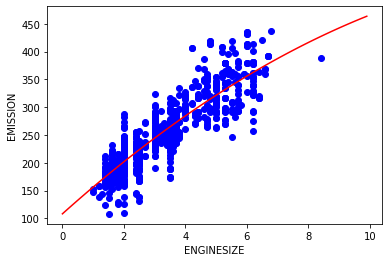

In [27]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSION')
plt.show()